### Plot resource usage

               Timestamp  CPU_Usage(%)  RAM_Usage(%)  RAM_Used(MB)  \
0    2024-11-05 15:40:25          57.7          12.6   3349.281250   
1    2024-11-05 15:40:27          48.9          13.4   3566.835938   
2    2024-11-05 15:40:29          50.5          14.0   3774.753906   
3    2024-11-05 15:40:31          51.0          14.9   4047.398438   
4    2024-11-05 15:40:33          50.7          16.1   4366.992188   
..                   ...           ...           ...           ...   
166  2024-11-05 15:46:06          51.0          18.7   5153.687500   
167  2024-11-05 15:46:08          50.8          18.7   5156.183594   
168  2024-11-05 15:46:10          51.1          18.7   5161.878906   
169  2024-11-05 15:46:12          50.7          18.7   5160.824219   
170  2024-11-05 15:46:14          51.1          18.8   5172.304688   

     GPU_0_Usage(%)  GPU_1_Usage(%)  GPU_0_Memory_Used(MB)  \
0               0.0             0.0                    5.0   
1               0.0             0.0

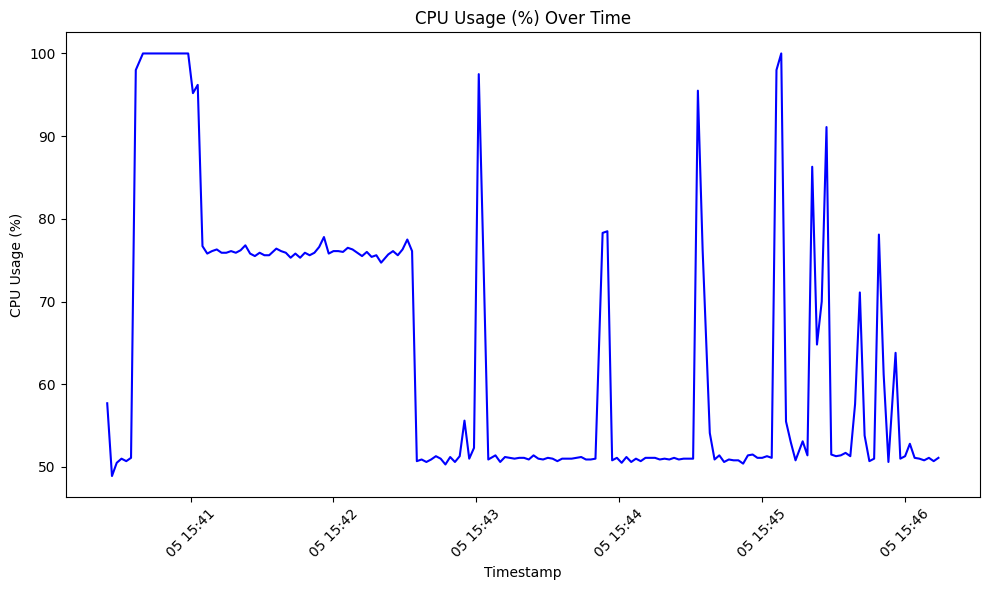

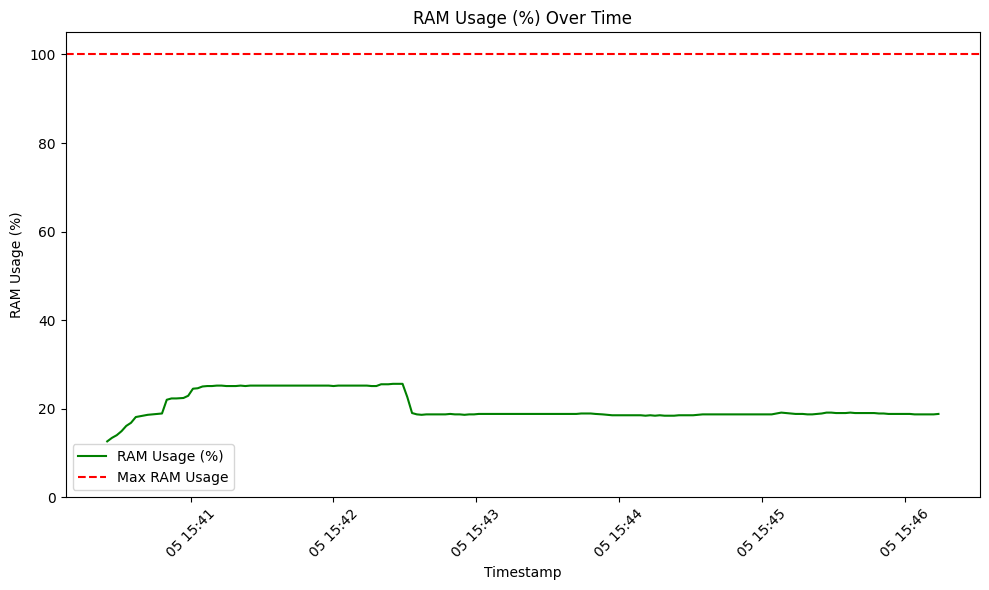

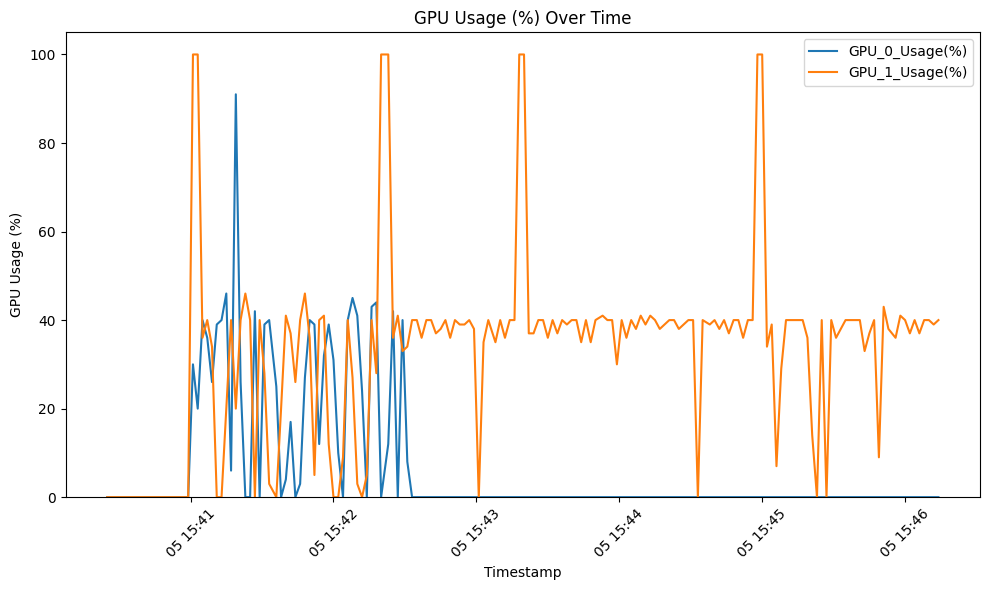

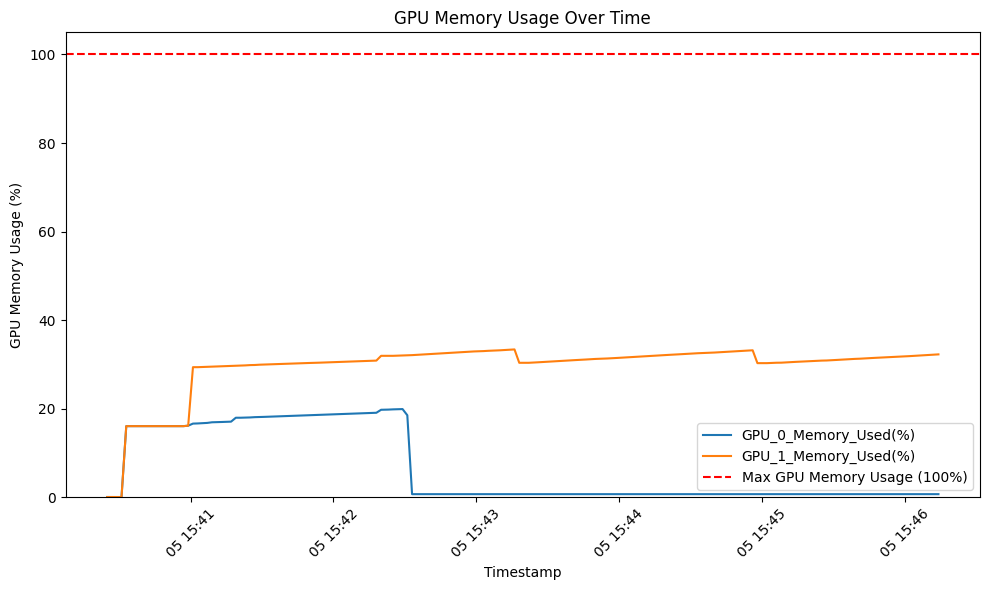

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

csv_file = Path("../../") / "subs" / "monitor_merged_llama_1B_notr_arc_augmented_v3_checkpoint_10352.csv"
n_gpus = 2
# Load the CSV file
data = pd.read_csv(
    csv_file
)
print(data)

# Convert Timestamp column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Plot CPU usage
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['CPU_Usage(%)'], label='CPU Usage (%)', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage (%) Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RAM usage with a line indicating the maximum RAM usage
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['RAM_Usage(%)'], label='RAM Usage (%)', color='green')
plt.axhline(y=100, color='red', linestyle='--', label='Max RAM Usage')
plt.xlabel('Timestamp')
plt.ylabel('RAM Usage (%)')
plt.title('RAM Usage (%) Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.ylim([0, 105])
plt.tight_layout()
plt.show()

# Plot GPU usage for each GPU
plt.figure(figsize=(10, 6))
gpu_usage_columns = [col for col in data.columns if "GPU_" in col and "Usage(%)" in col]
for col in gpu_usage_columns:
    plt.plot(data['Timestamp'], data[col], label=col)
plt.xlabel('Timestamp')
plt.ylabel('GPU Usage (%)')
plt.title('GPU Usage (%) Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim([0, 105])
plt.show()

# Plot GPU Memory usage for each GPU with a dashed line at 100% for max memory usage
plt.figure(figsize=(10, 6))
gpu_memory_columns = [col for col in data.columns if "GPU_" in col and "Memory_Used(%)" in col]
for col in gpu_memory_columns:
    plt.plot(data['Timestamp'], data[col], label=col)
plt.axhline(y=100, color='red', linestyle='--', label='Max GPU Memory Usage (100%)')
plt.xlabel('Timestamp')
plt.ylabel('GPU Memory Usage (%)')
plt.title('GPU Memory Usage Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim([0, 105])
plt.show()

